# Data Analisys

## Preparation

In [1]:
import sys

print("Python version")
print (sys.version)

Python version
3.5.2 (default, Oct  7 2020, 17:19:02) 
[GCC 5.4.0 20160609]


In [2]:
from IMPORTS import *
%matplotlib inline
%config Completer.use_jedi = False

## Let's look at the Data:

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = pd.read_csv('data/real_data_2days_sample.csv')
data.head()

,Date,SPY,SPY_Volume,VOO,VOO_Volume,IVV,IVV_Volume,QQQ,QQQ_Volume,DIA,...,FB,FB_Volume,GOOG,GOOG_Volume,GOOGL,GOOGL_Volume,NFLX,NFLX_Volume,TSLA,TSLA_Volume
0,16/10/2020 16:30,348.86,1882260.0,320.45,76176.0,350.10,74298.0,291.44,1754141.0,286.20,...,267.70,877508.0,1564.13,103191.0,1559.77,120846.0,548.80,297133.0,453.42,1004223.0
1,16/10/2020 16:31,348.83,2034820.0,320.47,83686.0,350.04,92424.0,291.29,1937743.0,286.43,...,267.51,929888.0,1568.33,108543.0,1561.60,123724.0,548.13,330078.0,453.25,1216417.0
2,16/10/2020 16:32,348.64,2225957.0,320.24,100169.0,349.83,108680.0,291.17,2078970.0,286.19,...,267.75,970944.0,1567.04,119376.0,1564.15,127460.0,547.70,358181.0,453.68,1370192.0
3,16/10/2020 16:33,348.97,2365141.0,320.55,107221.0,350.20,114778.0,291.24,2177064.0,286.66,...,267.45,1042412.0,1565.01,122050.0,1561.08,130542.0,547.51,386064.0,453.55,1514447.0
4,16/10/2020 16:34,349.16,2829262.0,320.74,111316.0,350.31,130981.0,291.55,2314285.0,286.77,...,268.19,1093218.0,1567.16,126753.0,1563.96,132723.0,548.49,414230.0,455.17,1748622.0


### We will separate the stocks from the volume:

In [16]:
list_of_graphs = []
for k in data.keys():
    if 'Volume' not in k:
        list_of_graphs.append(k)
# list_of_graphs = list_of_graphs[1:]
list_of_graphs
df_date_stocks = data[list_of_graphs]
df_date_stocks.head()

,Date,SPY,VOO,IVV,QQQ,DIA,TLT,GOVT,IEF,SHY,...,VCSH,IGSB,AMZN,AAPL,MSFT,FB,GOOG,GOOGL,NFLX,TSLA
0,16/10/2020 16:30,348.86,320.45,350.10,291.44,286.20,161.66,27.84,121.32,86.44,...,82.95,54.95,3366.49,121.39,220.13,267.70,1564.13,1559.77,548.80,453.42
1,16/10/2020 16:31,348.83,320.47,350.04,291.29,286.43,161.86,27.84,121.36,86.44,...,82.95,54.98,3365.97,121.14,220.09,267.51,1568.33,1561.60,548.13,453.25
2,16/10/2020 16:32,348.64,320.24,349.83,291.17,286.19,161.78,27.85,121.35,86.44,...,82.94,54.97,3359.89,120.93,219.70,267.75,1567.04,1564.15,547.70,453.68
3,16/10/2020 16:33,348.97,320.55,350.20,291.24,286.66,161.83,27.85,121.36,86.45,...,82.94,54.97,3364.02,120.99,219.99,267.45,1565.01,1561.08,547.51,453.55
4,16/10/2020 16:34,349.16,320.74,350.31,291.55,286.77,161.76,27.85,121.34,86.44,...,82.95,54.97,3373.68,121.06,220.42,268.19,1567.16,1563.96,548.49,455.17


## Raw Representation of the Data

The stocks:

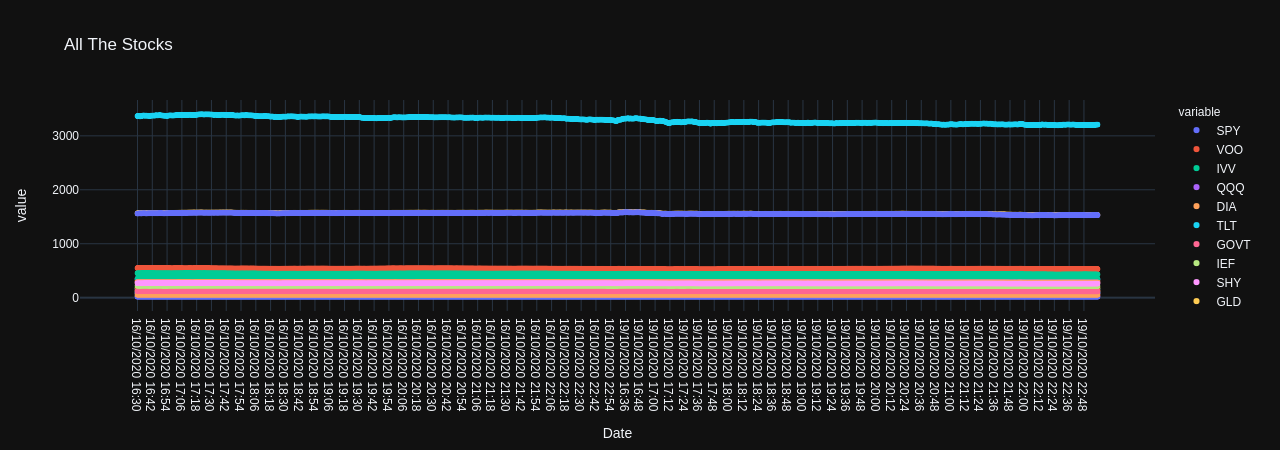

In [17]:
px.scatter(
    df_date_stocks,
    x='Date',
    y=list_of_graphs[1:], 
    title='All The Stocks',
    template='plotly_dark'
)

The volume:

In [19]:
list_of_graphs = []
for k in data.keys():
    if 'Volume' in k:
        list_of_graphs.append(k)
    if 'Date' in k:
        list_of_graphs.append(k)
# list_of_graphs = list_of_graphs[1:]
list_of_graphs
df_date_volume = data[list_of_graphs]
df_date_volume.head()

,Date,SPY_Volume,VOO_Volume,IVV_Volume,QQQ_Volume,DIA_Volume,TLT_Volume,GOVT_Volume,IEF_Volume,SHY_Volume,...,VCSH_Volume,IGSB_Volume,AMZN_Volume,AAPL_Volume,MSFT_Volume,FB_Volume,GOOG_Volume,GOOGL_Volume,NFLX_Volume,TSLA_Volume
0,16/10/2020 16:30,1882260.0,76176.0,74298.0,1754141.0,112945.0,279347.0,18711.0,32431.0,614.0,...,30483.0,14407.0,253574,6527030,2609274,877508.0,103191.0,120846.0,297133.0,1004223.0
1,16/10/2020 16:31,2034820.0,83686.0,92424.0,1937743.0,136767.0,376359.0,18723.0,47034.0,53988.0,...,32732.0,15533.0,290865,7256749,2725274,929888.0,108543.0,123724.0,330078.0,1216417.0
2,16/10/2020 16:32,2225957.0,100169.0,108680.0,2078970.0,145328.0,457571.0,20760.0,101544.0,55281.0,...,34922.0,16068.0,320752,8021302,2844876,970944.0,119376.0,127460.0,358181.0,1370192.0
3,16/10/2020 16:33,2365141.0,107221.0,114778.0,2177064.0,171102.0,484428.0,21104.0,106256.0,58970.0,...,35008.0,16883.0,339947,8726670,2939630,1042412.0,122050.0,130542.0,386064.0,1514447.0
4,16/10/2020 16:34,2829262.0,111316.0,130981.0,2314285.0,193479.0,544700.0,21219.0,122249.0,60330.0,...,35351.0,17897.0,373896,9231078,3006868,1093218.0,126753.0,132723.0,414230.0,1748622.0


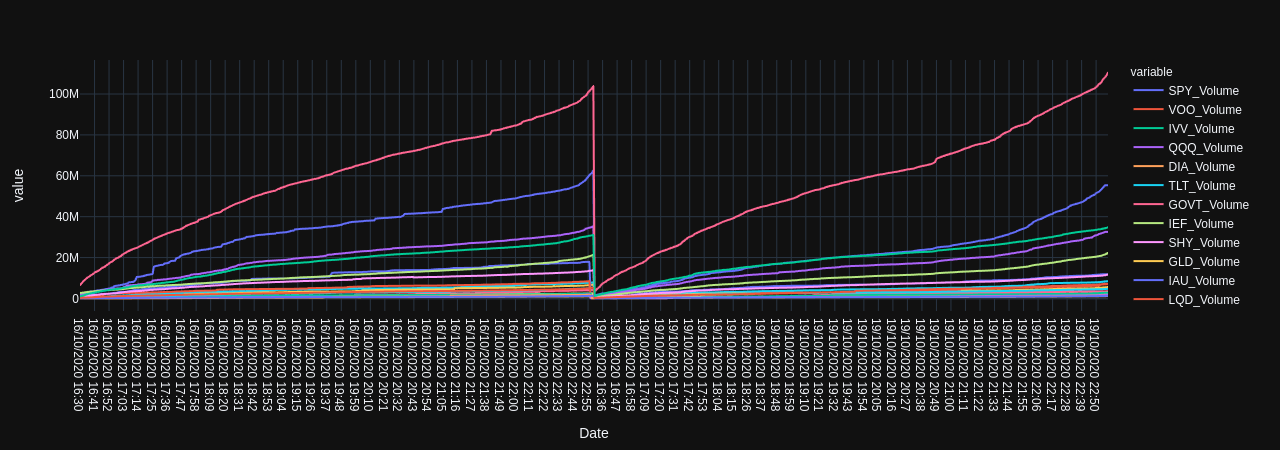

In [20]:
px.line(
    df_date_volume,
    x='Date',
    y=list_of_graphs
    ,
    template='plotly_dark'
)

In [14]:
list_of_graphs = []
for k in data.keys():
    if 'Volume' not in k:
        list_of_graphs.append(k)
# list_of_graphs = list_of_graphs[1:]
list_of_graphs
df_stocks = data[list_of_graphs]
df_stocks.head()

df = px.data.gapminder().query("continent=='Europe'")
df.head()
# fig = px.line_3d(df, x="gdpPercap", y="pop", z="year", color='country')
# fig.show()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.23,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.28,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.82,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.22,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.69,2263554,3313.422188,ALB,8


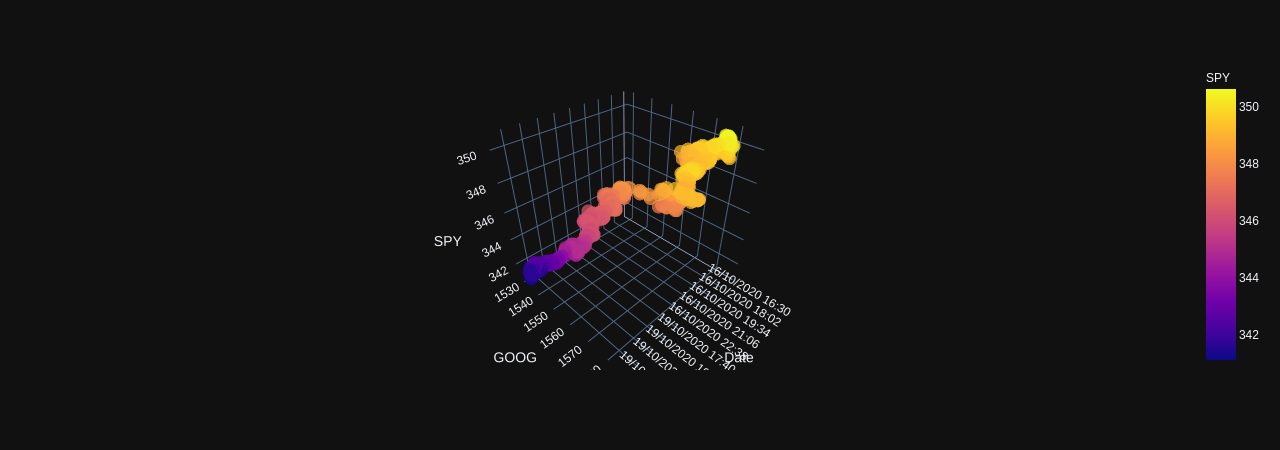

In [15]:
fig = px.scatter_3d(
    df_stocks,
    x='Date',
    y='GOOG',
    z='SPY',
    color='SPY',
    opacity=0.7,
    template='plotly_dark'
)
fig
# fig = px.line_3d(
#     df_stocks,
#     x='Date',
#     y='GOOG',
#     z='SPY',
#     color='SPY',
#     template='plotly_dark'
# )
# fig